In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("IMDB.csv")

df.head()

,Name,Year,Episodes,Type,Rating,Image-src,Description,Name-href
0,1. Breaking Bad,2008–2013,62 eps,TV-MA,9.5,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,A chemistry teacher diagnosed with inoperable ...,https://www.imdb.com/title/tt0903747/?ref_=cht...
1,2. Planet Earth II,2016,6 eps,TV-G,9.5,https://m.media-amazon.com/images/M/MV5BMGZmYm...,David Attenborough returns with a new wildlife...,https://www.imdb.com/title/tt5491994/?ref_=cht...
2,3. Planet Earth,2006,11 eps,TV-PG,9.4,https://m.media-amazon.com/images/M/MV5BMzMyYj...,A documentary series on the wildlife found on ...,https://www.imdb.com/title/tt0795176/?ref_=cht...
3,4. Band of Brothers,2001,10 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BMTI3OD...,The story of Easy Company of the U.S. Army 101...,https://www.imdb.com/title/tt0185906/?ref_=cht...
4,5. Chernobyl,2019,5 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BNTdkN2...,"In April 1986, an explosion at the Chernobyl n...",https://www.imdb.com/title/tt7366338/?ref_=cht...


In [ ]:
df.shape # small dataset

(250, 8)

In [ ]:
df.columns

Index(['Name', 'Year', 'Episodes', 'Type', 'Rating', 'Image-src',
       'Description', 'Name-href'],
      dtype='object')

In [ ]:
df = df[['Name', 'Year', 'Episodes', 'Type', 'Rating']]

In [ ]:
# Extract the first year from the 'Year' column
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

In [ ]:
df.head()

,Name,Year,Episodes,Type,Rating
0,1. Breaking Bad,2008.0,62 eps,TV-MA,9.5
1,2. Planet Earth II,2016.0,6 eps,TV-G,9.5
2,3. Planet Earth,2006.0,11 eps,TV-PG,9.4
3,4. Band of Brothers,2001.0,10 eps,TV-MA,9.4
4,5. Chernobyl,2019.0,5 eps,TV-MA,9.4


In [ ]:
# Linear Regression:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Let's predict rating of Year and Episodes
df['Episodes'] = df['Episodes'].str.extract('(\d+)').astype(float)
df['Episodes'].value_counts

<bound method IndexOpsMixin.value_counts of 0       62.0
1        6.0
2       11.0
3       10.0
4        5.0
       ...  
245    212.0
246     28.0
247     43.0
248     35.0
249     14.0
Name: Episodes, Length: 250, dtype: float64>

In [ ]:
X = df[['Year', 'Episodes']]
Y = df['Rating']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Making predictions on the test data
Y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.06770831580514737


on average, the squared difference between the predicted and actual ratings is relatively small.

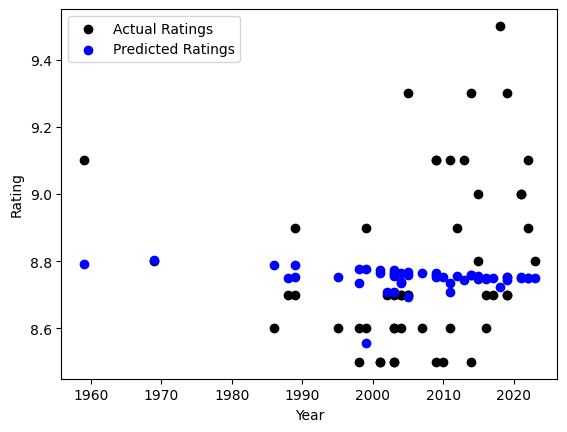

In [ ]:
# Visualising the results (optional)
plt.scatter(X_test['Year'], Y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['Year'], Y_pred, color='blue', label='Predicted Ratings')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()


In [ ]:
# Example: Provide a new set of features (Year and Episodes) for prediction
new_data = pd.DataFrame({'Year': [2022], 'Episodes': [8]})

# Use the trained model to make predictions
predicted_rating = model.predict(new_data)

# Print the predicted rating
print(f"Predicted Rating: {predicted_rating[0]}")

Predicted Rating: 8.75170706227318
